In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import resnet50
import os
import tensorflow as tf
import matplotlib

matplotlib.style.use('ggplot')

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
image_shape = (160, 120)
training_dir = 'D:\Blood Cell Detector\dataset2-master\dataset2-master\images\TRAIN'
valid_dir = 'D:\Blood Cell Detector\dataset2-master\dataset2-master\images\TEST'
test_dir = 'D:\Blood Cell Detector\dataset2-master\dataset2-master\images\TEST_SIMPLE'

In [4]:
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=30, horizontal_flip=True)

trainGen = dataGen.flow_from_directory(training_dir, shuffle=True, target_size=image_shape)
validGen = dataGen.flow_from_directory(valid_dir, shuffle=True, target_size=image_shape)
testGen = dataGen.flow_from_directory(test_dir, shuffle=True, target_size=image_shape)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', input_shape=(160, 120, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 158, 118, 8)       224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 79, 59, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 77, 57, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 28, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7488)             

In [20]:
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(160,120,3))

for layer in conv_model.layers:
    layer.trainable = False
    
inputs = tf.keras.Input(shape=(160, 120, 3))
x = tf.keras.layers.Flatten()(conv_model.output)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)
MODEL = tf.keras.models.Model(inputs=conv_model.input, outputs=x)

MODEL.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

MODEL.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 160, 120, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 126, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 80, 60, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 80, 60, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape = (160, 120, 3)),
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.SeparableConv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.SeparableConv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.SeparableConv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.SeparableConv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.SeparableConv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.SeparableConv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.SeparableConv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.SeparableConv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='tanh'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(units=128, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(units=4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkPoint = ModelCheckpoint(filepath='best_blood_cell.hdf5', save_best_only=True, save_weights_only=False)
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, verbose=1, mode='min', restore_best_weights = True)
learnRateRed = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.3, min_lr=0.000001)

history = model.fit(trainGen, epochs=30, validation_data=validGen, callbacks=[learnRateRed])

Epoch 1/30
312/312 [==============================] - 162s 511ms/step - loss: 1.2913 - accuracy: 0.3575 - val_loss: 1.6437 - val_accuracy: 0.2509
Epoch 2/30
312/312 [==============================] - 54s 172ms/step - loss: 0.5629 - accuracy: 0.7723 - val_loss: 2.6538 - val_accuracy: 0.4186
Epoch 3/30
312/312 [==============================] - 55s 176ms/step - loss: 0.4212 - accuracy: 0.8442 - val_loss: 0.6633 - val_accuracy: 0.8114
Epoch 4/30
312/312 [==============================] - 61s 195ms/step - loss: 0.3454 - accuracy: 0.8745 - val_loss: 4.1808 - val_accuracy: 0.3482
Epoch 5/30
312/312 [==============================] - 61s 195ms/step - loss: 0.3349 - accuracy: 0.8814 - val_loss: 1.8195 - val_accuracy: 0.4757
Epoch 6/30
312/312 [==============================] - 62s 197ms/step - loss: 0.2193 - accuracy: 0.9250 - val_loss: 0.6764 - val_accuracy: 0.8263
Epoch 7/30
312/312 [==============================] - 63s 200ms/step - loss: 0.1604 - accuracy: 0.9458 - val_loss: 0.5515 - val_a

In [15]:
print("Final Accuracy:", history.history['accuracy'][-1])
print("Final Val Accuracy:", history.history['val_accuracy'][-1])

Final Accuracy: 0.9787084460258484
Final Val Accuracy: 0.8560514450073242


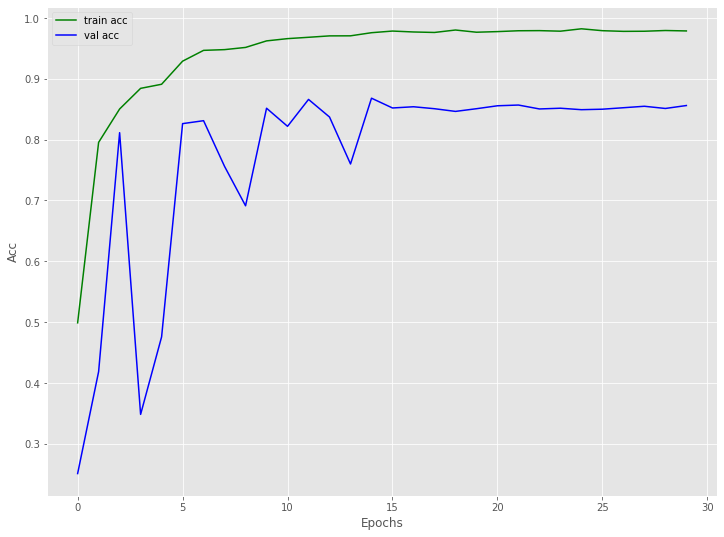

In [16]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['accuracy'], color='green', linestyle='-', label='train acc')
plt.plot(history.history['val_accuracy'], color='blue', linestyle='-', label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

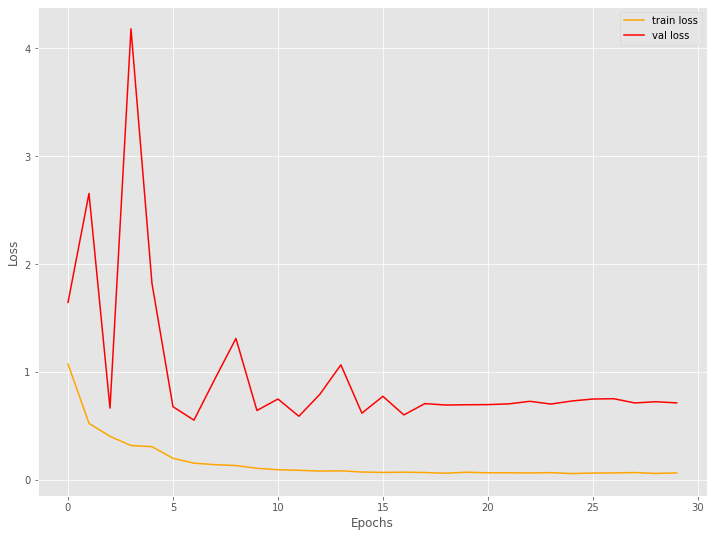

In [17]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'], color='orange', linestyle='-', label='train loss')
plt.plot(history.history['val_loss'], color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.save('best-model-blood-cell.h5')